In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn

# ANNs for Regression

### Create Data

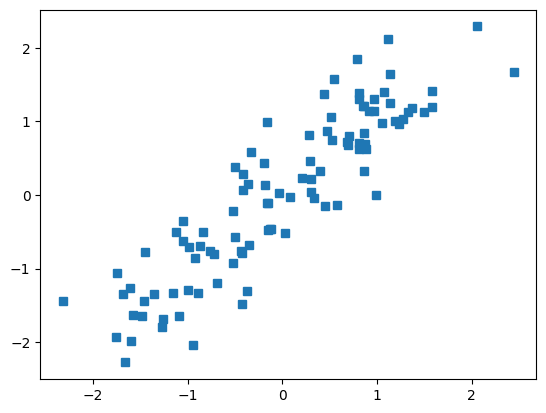

In [3]:
N = 100
x = torch.randn(N, 1)
y = x + 0.5 * torch.randn(N, 1)

plt.plot(x,y,'s')
plt.show()

### Build Model

In [8]:
model1 = nn.Sequential(
    nn.Linear(1,1,),
    nn.ReLU(),
    nn.Linear(1,1),
)

model1

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
lr = 0.05

loss_fn = nn.MSELoss()

#optimizer 
optimizer = torch.optim.SGD(model1.parameters(),lr = lr)

In [14]:
epochs = 100
losses = torch.zeros(epochs)

for i in range(epochs):

    yhat = model1(x)
    loss = loss_fn(yhat, y)
    losses[i] = loss 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.2914
Epoch 2/100, Loss: 0.2901
Epoch 3/100, Loss: 0.2889
Epoch 4/100, Loss: 0.2876
Epoch 5/100, Loss: 0.2864
Epoch 6/100, Loss: 0.2851
Epoch 7/100, Loss: 0.2839
Epoch 8/100, Loss: 0.2826
Epoch 9/100, Loss: 0.2814
Epoch 10/100, Loss: 0.2802
Epoch 11/100, Loss: 0.2790
Epoch 12/100, Loss: 0.2779
Epoch 13/100, Loss: 0.2769
Epoch 14/100, Loss: 0.2759
Epoch 15/100, Loss: 0.2749
Epoch 16/100, Loss: 0.2739
Epoch 17/100, Loss: 0.2730
Epoch 18/100, Loss: 0.2720
Epoch 19/100, Loss: 0.2712
Epoch 20/100, Loss: 0.2705
Epoch 21/100, Loss: 0.2699
Epoch 22/100, Loss: 0.2693
Epoch 23/100, Loss: 0.2687
Epoch 24/100, Loss: 0.2681
Epoch 25/100, Loss: 0.2675
Epoch 26/100, Loss: 0.2670
Epoch 27/100, Loss: 0.2664
Epoch 28/100, Loss: 0.2659
Epoch 29/100, Loss: 0.2653
Epoch 30/100, Loss: 0.2647
Epoch 31/100, Loss: 0.2642
Epoch 32/100, Loss: 0.2638
Epoch 33/100, Loss: 0.2633
Epoch 34/100, Loss: 0.2628
Epoch 35/100, Loss: 0.2623
Epoch 36/100, Loss: 0.2619
Epoch 37/100, Loss: 0.2615
Epoch 38/1

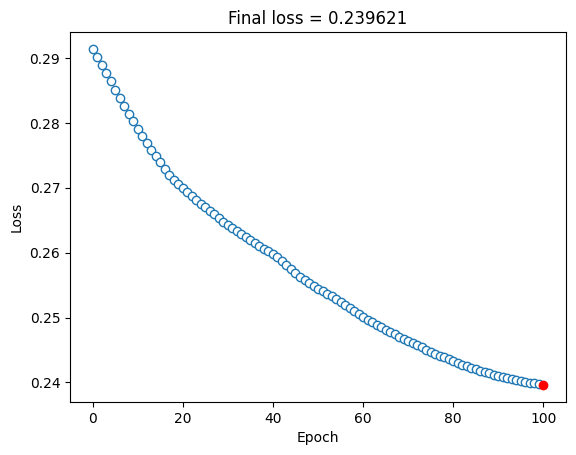

In [16]:
pred = model1(x)

testloss = (pred - y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(epochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()



# ANNs for Classification

### Create Data

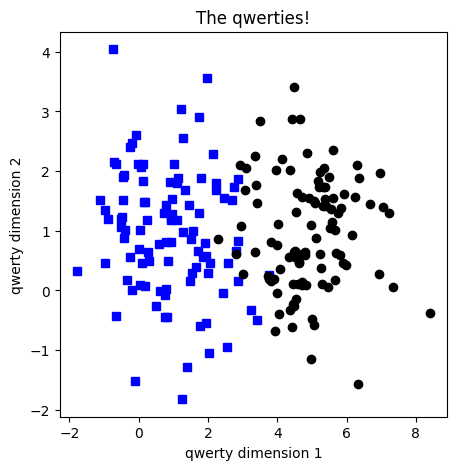

In [20]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [21]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


### Build Model

In [22]:
model2 = nn.Sequential(
    nn.Linear(2,1), #input layer
    nn.ReLU(),      #activation function
    nn.Linear(1,1), #output layer
    nn.Sigmoid() #final activation function
)

model2

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [23]:
lr = 0.01


loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model2.parameters(),lr = lr)

In [24]:
epochs = 1000
losses = torch.zeros(epochs)

for i in range(epochs):
    yhat = model2(data)
    loss = loss_fn(yhat, labels)
    losses[i] = loss 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/1000, Loss: 0.6949
Epoch 2/1000, Loss: 0.6949
Epoch 3/1000, Loss: 0.6948
Epoch 4/1000, Loss: 0.6948
Epoch 5/1000, Loss: 0.6948
Epoch 6/1000, Loss: 0.6948
Epoch 7/1000, Loss: 0.6948
Epoch 8/1000, Loss: 0.6948
Epoch 9/1000, Loss: 0.6948
Epoch 10/1000, Loss: 0.6948
Epoch 11/1000, Loss: 0.6948
Epoch 12/1000, Loss: 0.6948
Epoch 13/1000, Loss: 0.6947
Epoch 14/1000, Loss: 0.6947
Epoch 15/1000, Loss: 0.6947
Epoch 16/1000, Loss: 0.6947
Epoch 17/1000, Loss: 0.6947
Epoch 18/1000, Loss: 0.6947
Epoch 19/1000, Loss: 0.6947
Epoch 20/1000, Loss: 0.6947
Epoch 21/1000, Loss: 0.6947
Epoch 22/1000, Loss: 0.6947
Epoch 23/1000, Loss: 0.6947
Epoch 24/1000, Loss: 0.6946
Epoch 25/1000, Loss: 0.6946
Epoch 26/1000, Loss: 0.6946
Epoch 27/1000, Loss: 0.6946
Epoch 28/1000, Loss: 0.6946
Epoch 29/1000, Loss: 0.6946
Epoch 30/1000, Loss: 0.6946
Epoch 31/1000, Loss: 0.6946
Epoch 32/1000, Loss: 0.6946
Epoch 33/1000, Loss: 0.6946
Epoch 34/1000, Loss: 0.6946
Epoch 35/1000, Loss: 0.6945
Epoch 36/1000, Loss: 0.6945
E

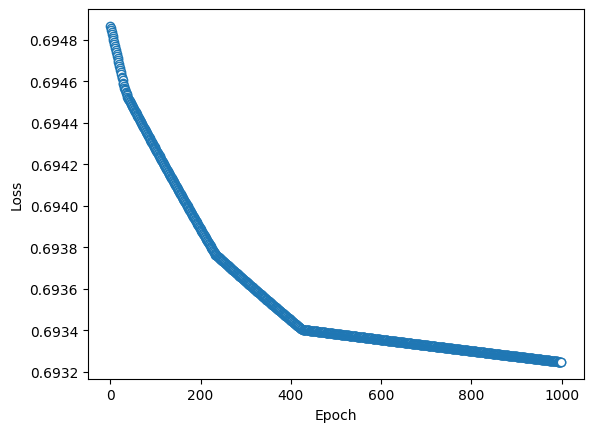

In [25]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [30]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = model2(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 50%


###  Loss seems to be very high still, lets modify model2

In [47]:
model3 = nn.Sequential(
    nn.Linear(2, 16),   # input layer (2 features → 16 hidden units)
    nn.ReLU(),
    nn.Linear(16, 8),   # hidden layer (16 → 8)
    nn.ReLU(),
    nn.Linear(8, 4),    # hidden layer (8 → 4)
    nn.ReLU(),
    nn.Linear(4, 4),    # hidden layer (4 → 4)
    nn.Sigmoid(),
    nn.Linear(4, 4),    # hidden layer (4 → 4)
    nn.ReLU(),
    nn.Linear(4, 1),    # output layer (4 → 1)
    nn.Sigmoid()        # final activation for binary classification
)



lr = 0.001
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model3.parameters(),lr = lr)


epochs = 1000
losses = torch.zeros(epochs)

for i in range(epochs):
    yhat = model3(data)
    loss = loss_fn(yhat, labels)
    losses[i] = loss 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/1000, Loss: 0.7080
Epoch 2/1000, Loss: 0.7076
Epoch 3/1000, Loss: 0.7072
Epoch 4/1000, Loss: 0.7068
Epoch 5/1000, Loss: 0.7065
Epoch 6/1000, Loss: 0.7061
Epoch 7/1000, Loss: 0.7058
Epoch 8/1000, Loss: 0.7055
Epoch 9/1000, Loss: 0.7051
Epoch 10/1000, Loss: 0.7048
Epoch 11/1000, Loss: 0.7045
Epoch 12/1000, Loss: 0.7042
Epoch 13/1000, Loss: 0.7039
Epoch 14/1000, Loss: 0.7036
Epoch 15/1000, Loss: 0.7034
Epoch 16/1000, Loss: 0.7031
Epoch 17/1000, Loss: 0.7028
Epoch 18/1000, Loss: 0.7025
Epoch 19/1000, Loss: 0.7023
Epoch 20/1000, Loss: 0.7020
Epoch 21/1000, Loss: 0.7018
Epoch 22/1000, Loss: 0.7015
Epoch 23/1000, Loss: 0.7013
Epoch 24/1000, Loss: 0.7010
Epoch 25/1000, Loss: 0.7008
Epoch 26/1000, Loss: 0.7006
Epoch 27/1000, Loss: 0.7004
Epoch 28/1000, Loss: 0.7001
Epoch 29/1000, Loss: 0.6999
Epoch 30/1000, Loss: 0.6997
Epoch 31/1000, Loss: 0.6995
Epoch 32/1000, Loss: 0.6992
Epoch 33/1000, Loss: 0.6990
Epoch 34/1000, Loss: 0.6988
Epoch 35/1000, Loss: 0.6986
Epoch 36/1000, Loss: 0.6984
E

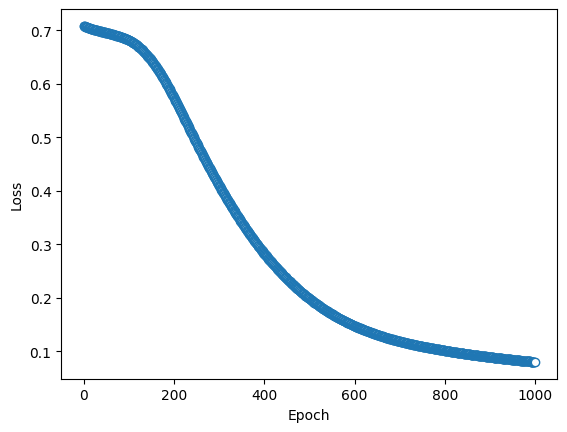

In [48]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [50]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = model3(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 98.5%
